In [1]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
import tensorflow as tf
import tensorflow.keras as keras

# set seed
import random
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

<figure>
    <center>
    <img src="https://img.freepik.com/free-vector/innovation-management-software-abstract-concept-illustration-idea-management-brainstorming-tool-innovation-control-collaboration-space-business-development-software_335657-500.jpg?w=740&t=st=1664296174~exp=1664296774~hmac=0f12007ab78708d0b91400505cc16570591749051b828d913a2430eb72224c33" width="20%">
    <figcaption>Source: Freepik</figcaption>
    </center>
</figure>

# Read Data

In [2]:
df_call = pd.read_pickle('data_input/df_call_detail_records_dec_cut.pkl').set_index(['datetime'])
df_call.head()

,squareid,internet,sms,calls
datetime,,,,
2013-12-01 06:00:00,1,77.283683,2.192212,0.819809
2013-12-01 06:00:00,2,77.465341,2.211839,0.824010
2013-12-01 06:00:00,3,77.658709,2.232732,0.828482
2013-12-01 06:00:00,4,76.757508,2.135362,0.807641
2013-12-01 06:00:00,5,70.700523,2.056988,0.753828


This dataset serves as measure of the level of interaction between the users and the mobile phone network.

- **datetime**: start interval time expressed in milliseconds. The end interval time can be obtained by adding 600,000 milliseconds (10 min) to this value;
- **squareid**: identification string of a given square of Milan/Trentino GRID;
- **sms**: activity proportional to the amount of received and sent SMSs inside a given Square id and during a given Time interval. The SMSs are received and sent from the nation identified by the Country code;
- **call**: activity proportional to the amount of received and issued calls inside the Square id during a given Time interval. The calls are received and issued from the nation identified by the Country code;
- **internet**: number of CDRs generated inside a given Square id during a given Time interval. The Internet traffic is initiated from the nation identified by the Country code;
    + a CDR is generated each time a user starts an Internet connection or ends an Internet connection. During the same connection, a CDR is generated if the connection lasts for more than 15 min or the user transferred more than 5 MB.

In [4]:
df_call['squareid'].nunique()

9998

In [3]:
df_call.sort_values('internet',ascending=False)

,squareid,internet,sms,calls
datetime,,,,
2013-12-01 22:00:00,5161,40252.504929,3227.411494,2506.770783
2013-12-01 23:00:00,5161,37046.810177,3053.433762,2580.940768
2013-12-07 23:00:00,5161,34857.472007,4648.682461,4337.729896
2013-12-07 22:00:00,5161,34811.857176,4095.891329,3826.101165
2013-12-01 21:00:00,5161,34593.150069,2261.419349,1968.203682
...,...,...,...,...
2013-12-21 04:00:00,4572,0.000000,0.000000,18.348425
2013-12-21 04:00:00,4573,0.000000,0.000000,2.030084
2013-12-21 04:00:00,4574,0.000000,0.000000,1.860609


In [4]:
df_call.sort_values('sms',ascending=False)

,squareid,internet,sms,calls
datetime,,,,
2013-12-05 00:00:00,4874,7185.844560,5804.560695,2235.067329
2013-12-13 00:00:00,4874,7456.815706,5769.857526,2456.659634
2013-12-12 00:00:00,4874,7397.045378,5460.637696,2397.965940
2013-12-03 00:00:00,4874,8314.339258,5075.334274,2132.188478
2013-12-18 00:00:00,4874,6948.475488,5026.663115,2408.520257
...,...,...,...,...
2013-12-12 09:00:00,8432,100.812532,0.000000,0.000000
2013-12-18 10:00:00,9733,20.428954,0.000000,0.000000
2013-12-12 09:00:00,8431,103.813793,0.000000,0.000000


In [5]:
df_call.sort_values('calls',ascending=False)

,squareid,internet,sms,calls
datetime,,,,
2013-12-16 17:00:00,6064,11831.893878,3745.094258,4434.699166
2013-12-16 16:00:00,6064,11557.926749,3412.768313,4414.527512
2013-12-07 23:00:00,5161,34857.472007,4648.682461,4337.729896
2013-12-14 23:00:00,5161,33606.866111,4744.768596,4027.278076
2013-12-07 22:00:00,5161,34811.857176,4095.891329,3826.101165
...,...,...,...,...
2013-12-21 11:00:00,5014,39.122518,0.725273,0.000000
2013-12-21 11:00:00,5013,34.895118,0.661657,0.000000
2013-12-21 11:00:00,5012,27.280392,0.461986,0.000000


<AxesSubplot:xlabel='datetime'>

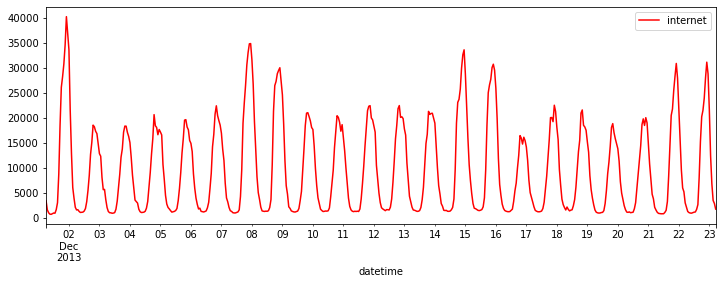

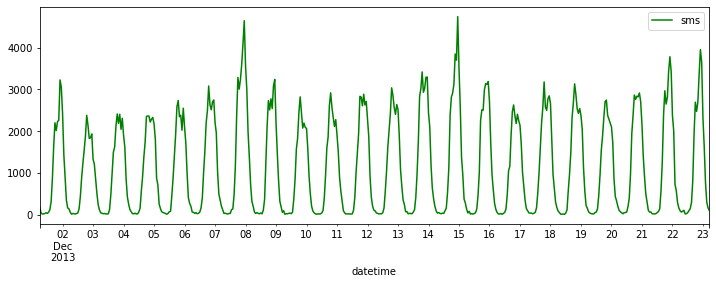

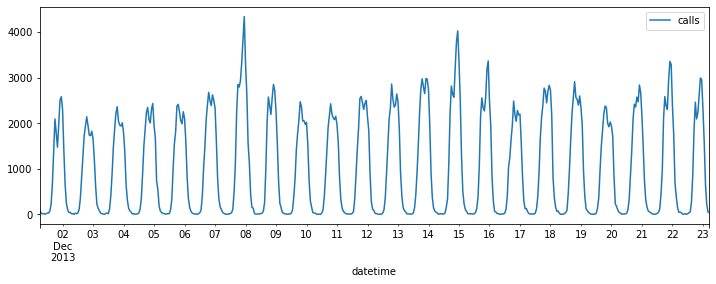

In [12]:
df_5161_inet = df_call[df_call['squareid'] == 5161][['internet']]
df_5161_inet.plot(color='red', figsize=(12,4))

df_5161_sms = df_call[df_call['squareid'] == 5161][['sms']]
df_5161_sms.plot(color='green', figsize=(12,4))

df_5161_call = df_call[df_call['squareid'] == 5161][['calls']]
df_5161_call.plot(figsize=(12,4))

In [13]:
# take the index, containing datetime
date_5161 = df_5161_inet.index

# make a Series of complete date
complete_date = pd.Series(pd.date_range(start=date_5161.min(), end=date_5161.max(), freq='H'))

# compare between complete_date and df_5161_dt
mask = complete_date.isin(date_5161)

# print out all skipped datetime
# if empty, then you are good to go
complete_date[~ mask]

Series([], dtype: datetime64[ns])

In [14]:
N = 1000 # number of data
t = np.arange(0, N) # time index
x = np.sin(0.075*t) + np.cos(0.005*t) + 0.002*t + np.random.rand(N) # univariate time series
df = pd.DataFrame({'Actual': x})

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)
train, test = df_train.values, df_test.values # dataframe to array
print("TRAIN SHAPE:\t", train.shape)
print("TEST SHAPE:\t", test.shape)

TRAIN SHAPE:	 (800, 1)
TEST SHAPE:	 (200, 1)


In [16]:
df_train_inet, df_test_inet = train_test_split(df_5161_inet, test_size=24*7 , shuffle=False)

In [17]:
df_train_sms, df_test_sms = train_test_split(df_5161_sms, test_size=24*7 , shuffle=False)

In [18]:
df_train_call, df_test_call = train_test_split(df_5161_call, test_size=24*7 , shuffle=False)

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [20]:
scaler = MinMaxScaler()
scaled_train_inet = scaler.fit_transform(df_train_inet)
scaled_test_inet = scaler.transform(df_test_inet)

In [21]:
scaler = MinMaxScaler()
scaled_train_sms = scaler.fit_transform(df_train_sms)
scaled_test_sms = scaler.transform(df_test_sms)

In [22]:
scaler = MinMaxScaler()
scaled_train_sms = scaler.fit_transform(df_train_sms)
scaled_test_sms = scaler.transform(df_test_sms)

In [33]:
scaler = MinMaxScaler()
scaled_train_call = scaler.fit_transform(df_train_call)
scaled_test_call= scaler.transform(df_test_call)

In [23]:
from keras.preprocessing.sequence import TimeseriesGenerator

look_back = 24*5 
train_gen_inet = TimeseriesGenerator(data=scaled_train_inet, targets=scaled_train_inet, length=look_back, batch_size=1)
test_gen_inet = TimeseriesGenerator(data=scaled_test_inet, targets=scaled_test_inet, length=look_back, batch_size=1)

In [24]:
look_back = 24*5
train_gen_sms = TimeseriesGenerator(data=scaled_train_sms, targets=scaled_train_sms, length=look_back, batch_size=1)
test_gen_sms = TimeseriesGenerator(data=scaled_test_inet, targets=scaled_test_sms, length=look_back, batch_size=1)

In [34]:
look_back = 24*5 
train_gen_call = TimeseriesGenerator(data=scaled_train_call, targets=scaled_train_call, length=look_back, batch_size=1)
test_gen_call = TimeseriesGenerator(data=scaled_test_call, targets=scaled_test_call, length=look_back, batch_size=1)

# Arsitektur Modell

In [27]:
def init_model_lstm():
    # define architecture
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(units=64, input_shape=(look_back, 1)))
    model.add(keras.layers.Dense(units=1, activation='relu'))
    
    # model compile
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

model_lstm = init_model_lstm()
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [28]:
# fitting model internet
model_lstm.fit(train_gen_inet, epochs=10)

Epoch 1/10
240/240 [==============================] - 11s 39ms/step - loss: 0.0374
Epoch 2/10
240/240 [==============================] - 14s 58ms/step - loss: 0.0057
Epoch 3/10
240/240 [==============================] - 13s 55ms/step - loss: 0.0043
Epoch 4/10
240/240 [==============================] - 13s 55ms/step - loss: 0.0047
Epoch 5/10
240/240 [==============================] - 13s 53ms/step - loss: 0.0038
Epoch 6/10
240/240 [==============================] - 13s 54ms/step - loss: 0.0032
Epoch 7/10
240/240 [==============================] - 13s 55ms/step - loss: 0.0032
Epoch 8/10
240/240 [==============================] - 13s 53ms/step - loss: 0.0031
Epoch 9/10
240/240 [==============================] - 13s 54ms/step - loss: 0.0026
Epoch 10/10
240/240 [==============================] - 13s 53ms/step - loss: 0.0029


In [29]:
# fitting model sms
model_lstm.fit(train_gen_sms, epochs=10)

Epoch 1/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0057
Epoch 2/10
240/240 [==============================] - 13s 54ms/step - loss: 0.0046
Epoch 3/10
240/240 [==============================] - 15s 61ms/step - loss: 0.0047
Epoch 4/10
240/240 [==============================] - 16s 65ms/step - loss: 0.0049
Epoch 5/10
240/240 [==============================] - 15s 64ms/step - loss: 0.0047
Epoch 6/10
240/240 [==============================] - 14s 58ms/step - loss: 0.0043
Epoch 7/10
240/240 [==============================] - 13s 54ms/step - loss: 0.0042
Epoch 8/10
240/240 [==============================] - 13s 53ms/step - loss: 0.0045
Epoch 9/10
240/240 [==============================] - 13s 54ms/step - loss: 0.0041
Epoch 10/10
240/240 [==============================] - 13s 54ms/step - loss: 0.0039


In [35]:
# fitting model internet
model_lstm.fit(train_gen_call, epochs=10)

Epoch 1/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0041
Epoch 2/10
240/240 [==============================] - 13s 53ms/step - loss: 0.0038
Epoch 3/10
240/240 [==============================] - 13s 54ms/step - loss: 0.0030
Epoch 4/10
240/240 [==============================] - 13s 53ms/step - loss: 0.0031
Epoch 5/10
240/240 [==============================] - 13s 54ms/step - loss: 0.0027
Epoch 6/10
240/240 [==============================] - 13s 53ms/step - loss: 0.0023
Epoch 7/10
240/240 [==============================] - 13s 53ms/step - loss: 0.0023
Epoch 8/10
240/240 [==============================] - 13s 54ms/step - loss: 0.0021
Epoch 9/10
240/240 [==============================] - 13s 54ms/step - loss: 0.0019
Epoch 10/10
240/240 [==============================] - 13s 54ms/step - loss: 0.0021


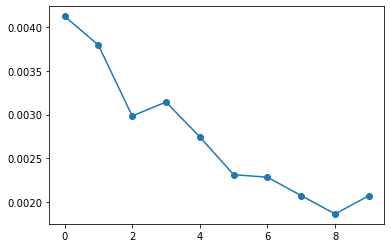

In [36]:
plt.plot(model_lstm.history.history['loss'], marker='o')
plt.show()

In [37]:
scaled_train_predict_inet = model_lstm.predict(train_gen_inet)
train_predict_inet = scaler.inverse_transform(scaled_train_predict_inet)
train_predict_inet.shape

240/240 [==============================] - 2s 6ms/step


(240, 1)

In [38]:
scaled_train_predict_sms = model_lstm.predict(train_gen_sms)
train_predict_sms = scaler.inverse_transform(scaled_train_predict_sms)
train_predict_sms.shape

240/240 [==============================] - 1s 5ms/step


(240, 1)

In [39]:
scaled_train_predict_call = model_lstm.predict(train_gen_call)
train_predict_call = scaler.inverse_transform(scaled_train_predict_call)
train_predict_call.shape

240/240 [==============================] - 1s 5ms/step


(240, 1)

In [40]:
scaled_test_predict_inet = model_lstm.predict(test_gen_inet)
test_predict_inet = scaler.inverse_transform(scaled_test_predict_inet)

48/48 [==============================] - 0s 5ms/step


In [41]:
scaled_test_predict_call = model_lstm.predict(test_gen_call)
test_predict_call = scaler.inverse_transform(scaled_test_predict_call)

48/48 [==============================] - 0s 5ms/step


In [42]:
scaled_test_predict_sms = model_lstm.predict(test_gen_sms)
test_predict_sms = scaler.inverse_transform(scaled_test_predict_sms)

48/48 [==============================] - 0s 6ms/step


<AxesSubplot:xlabel='datetime'>

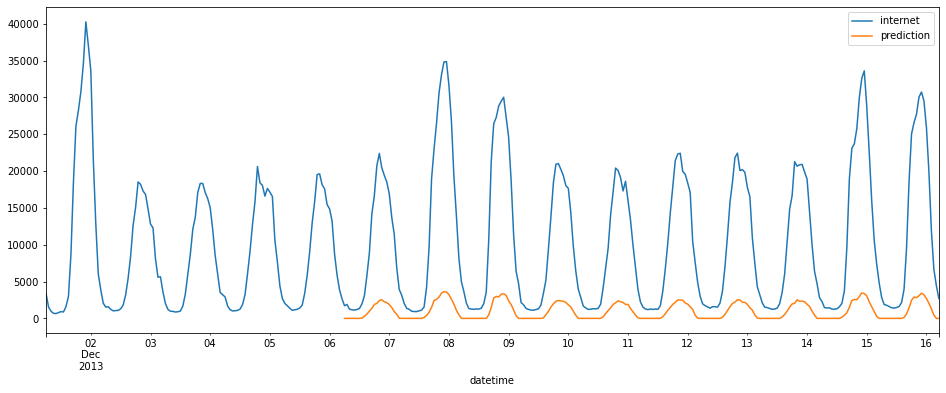

In [43]:
#Internet
# create numpy array containing nan 
temp = np.empty((df_train_inet.shape[0], 1))
temp[:] = np.nan

# fill the array with train_predict
temp[-len(train_predict_inet):] = train_predict_inet

df_train_inet["prediction"] = temp

# visualize
df_train_inet.plot(figsize=(16, 6))

<AxesSubplot:xlabel='datetime'>

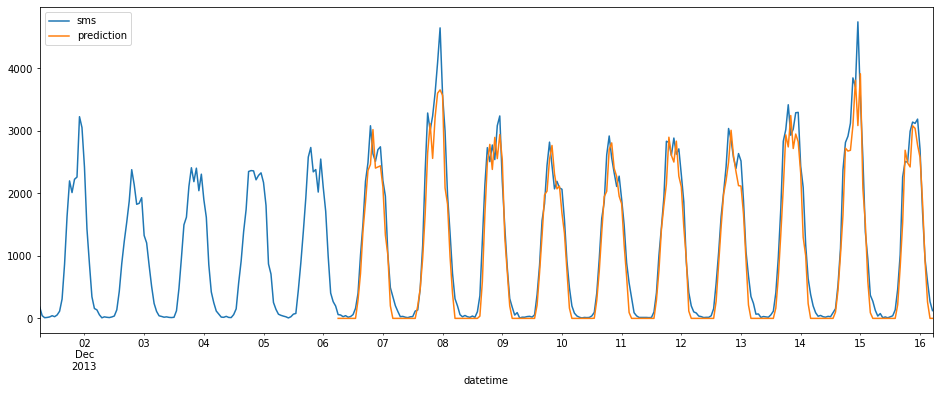

In [44]:
#SMS
# create numpy array containing nan 
temp = np.empty((df_train_sms.shape[0], 1))
temp[:] = np.nan

# fill the array with train_predict
temp[-len(train_predict_sms):] = train_predict_sms

df_train_sms["prediction"] = temp

# visualize
df_train_sms.plot(figsize=(16, 6))

<AxesSubplot:xlabel='datetime'>

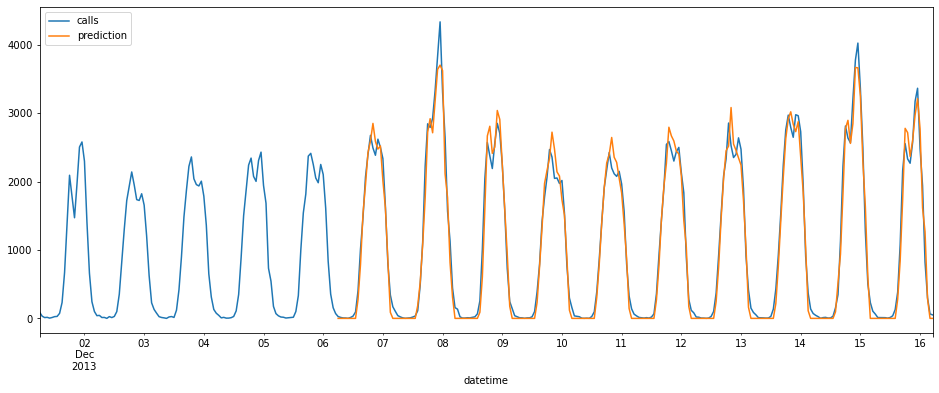

In [45]:
#calls
# create numpy array containing nan 
temp = np.empty((df_train_call.shape[0], 1))
temp[:] = np.nan

# fill the array with train_predict
temp[-len(train_predict_call):] = train_predict_call

df_train_call["prediction"] = temp

# visualize
df_train_call.plot(figsize=(16, 6))

# Evaluasi Model

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
# TRAIN RMSE Internet
df_train_inet = df_train_inet.dropna()
mean_squared_error(
    y_true=df_train_inet['internet'],
    y_pred=df_train_inet['prediction'],
    squared=False
)

12905.786973642034

In [48]:
# TRAIN RMSE SMS
df_train_sms = df_train_sms.dropna()
mean_squared_error(
    y_true=df_train_sms['sms'],
    y_pred=df_train_sms['prediction'],
    squared=False
)

299.8266085091475

In [49]:
# TRAIN RMSE SMS
df_train_call = df_train_call.dropna()
mean_squared_error(
    y_true=df_train_call['calls'],
    y_pred=df_train_call['prediction'],
    squared=False
)

175.3562680389692

<AxesSubplot:xlabel='datetime'>

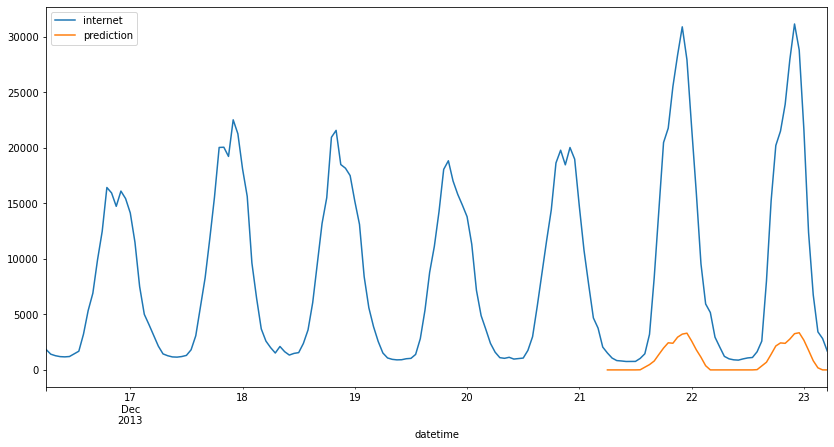

In [50]:
# create numpy array containing nan
temp = np.empty((df_test_inet.shape[0], 1))
temp[:] = np.nan

# fill the array with train_predict
temp[-len(test_predict_inet):] = test_predict_inet

df_test_inet["prediction"] = temp

# visualize
df_test_inet.plot(figsize=(14, 7))

<AxesSubplot:xlabel='datetime'>

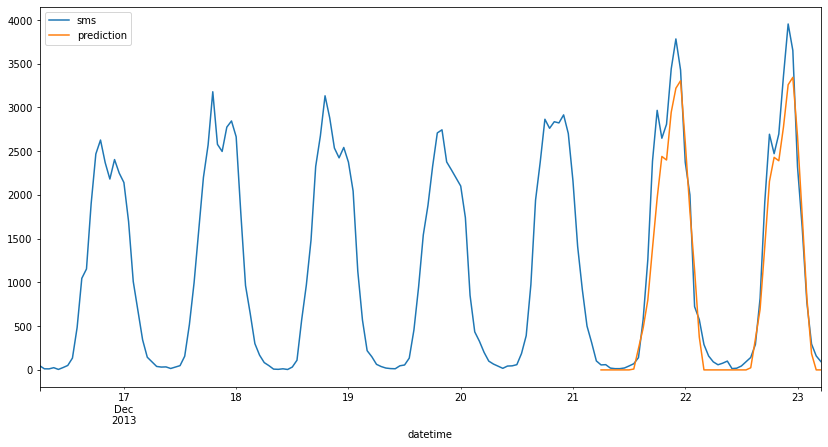

In [51]:
# create numpy array containing nan
temp = np.empty((df_test_sms.shape[0], 1))
temp[:] = np.nan

# fill the array with train_predict
temp[-len(test_predict_sms):] = test_predict_sms
df_test_sms["prediction"] = temp

# visualize
df_test_sms.plot(figsize=(14, 7))

<AxesSubplot:xlabel='datetime'>

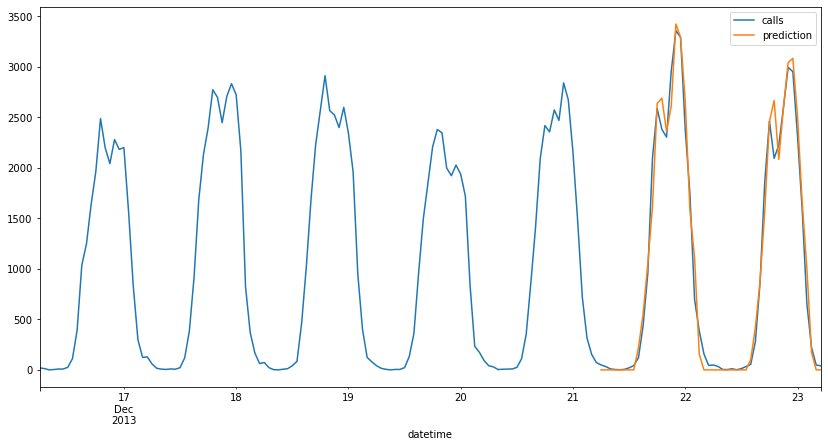

In [52]:
# create numpy array containing nan
temp = np.empty((df_test_call.shape[0], 1))
temp[:] = np.nan

# fill the array with train_predict
temp[-len(test_predict_call):] = test_predict_call

df_test_call["prediction"] = temp

# visualize
df_test_call.plot(figsize=(14, 7))

In [53]:
# TEST RMSE Internet
df_test_inet = df_test_inet.dropna()
mean_squared_error(
    y_true=df_test_inet['internet'],
    y_pred=df_test_inet['prediction'],
    squared=False #agar mengembalikan root mean squared error
)

13080.644383704657

In [54]:
# TEST RMSE SMS
df_test_sms = df_test_sms.dropna()
mean_squared_error(
    y_true=df_test_sms['sms'],
    y_pred=df_test_sms['prediction'],
    squared=False #agar mengembalikan root mean squared error
)

331.19370827074476

In [55]:
# TEST RMSE Calls
df_test_call = df_test_call.dropna()
mean_squared_error(
    y_true=df_test_call['calls'],
    y_pred=df_test_call['prediction'],
    squared=False #agar mengembalikan root mean squared error
)

176.43690858969364